In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
base_obl_people = gpd.read_file('data/base_obl_people_3000.geojson')
data = base_obl_people
data

,id,name,type,gicity,okrug,District,people,okato,oktmo,geometry
0,230557,Архангельск,город,Архангельская область,Городской округ Архангельск,,351226,,,"MULTIPOLYGON (((4493091.726 9477392.354, 44930..."
1,230711,Карпогоры,село,Архангельская область,Карпогорское сельское поселение,Пинежский муниципальный район,4443,11248808001,11648408101,"MULTIPOLYGON (((4945059.655 9353419.111, 49451..."
2,230714,Катунино,поселок,Архангельская область,Катунинское сельское поселение,Приморский муниципальный район,3443,11252820001,11652420101,"MULTIPOLYGON (((4524431.479 9449070.848, 45248..."
3,230783,Лешуконское,село,Архангельская область,Лешуконское сельское поселение,Лешуконский муниципальный район,4406,11238808001,11638408101,"MULTIPOLYGON (((5097053.154 9583529.095, 50970..."
4,230820,Мезень,город,Архангельская область,Городское поселение Мезенское,Мезенский муниципальный район,3325,11242501000,11642101001,"MULTIPOLYGON (((4923043.334 9838336.924, 49230..."
...,...,...,...,...,...,...,...,...,...,...
83,234799,Усть-Цильма,село,Республика Коми,Сельское поселение Усть-Ци,Усть-Цилемский муниципальный район,4877,87252840001,87652440101,"MULTIPOLYGON (((5806815.764 9730929.894, 58068..."
84,234875,Ханымей,поселок,Ямало-Ненецкий автономный округ,сельское поселение Ханымей,Пуровский муниципальный округ,4542,71160000008,71940000136,"MULTIPOLYGON (((8449937.049 9279753.819, 84499..."
85,234898,Харп,рабочий поселок,Ямало-Ненецкий автономный округ,городское поселение п. Харп,город Лабытнанги,5987,71158651000,71953000052,"MULTIPOLYGON (((7326259.615 10094801.598, 7325..."
86,235170,Эгвекинот,поселок городского типа,Чукотский автономный округ,ГП Эгвекинот,Городской округ Эгвекинот,3034,77215551000,77715000051,"MULTIPOLYGON (((-19940923.997 9965870.714, -19..."


In [3]:
print (data.crs.name)
data = data.to_crs('WGS84')
print(data.crs.name)
base_obl_people = data
data.head(3)

WGS 84 / Pseudo-Mercator
WGS 84


,id,name,type,gicity,okrug,District,people,okato,oktmo,geometry
0,230557,Архангельск,город,Архангельская область,Городской округ Архангельск,,351226,,,"MULTIPOLYGON (((40.36213 64.49810, 40.36172 64..."
1,230711,Карпогоры,село,Архангельская область,Карпогорское сельское поселение,Пинежский муниципальный район,4443,11248808001,11648408101,"MULTIPOLYGON (((44.42223 64.01439, 44.42318 64..."
2,230714,Катунино,поселок,Архангельская область,Катунинское сельское поселение,Приморский муниципальный район,3443,11252820001,11652420101,"MULTIPOLYGON (((40.64366 64.38834, 40.64705 64..."


<AxesSubplot:>

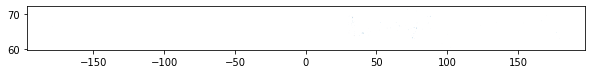

In [4]:
data.plot(figsize=(10,10))

In [5]:
all_res = []

def convert(objectid):
    obj = data[data.id == objectid]
    for _, row in obj.iterrows():
        seq = row.geometry.geoms
        polygons = []
        for polygon in seq:
            x, y = polygon.exterior.xy
            pairs = zip(x, y)
            coords = []
            for pair in pairs:
                coords.append([pair[1], pair[0]])
            polygons.append(coords)
        obj = {}
        obj['id'] = objectid
        obj['type'] = row.type
        obj['name'] = row.name
        obj['gicity'] = row.gicity
        obj['okrug'] = row.okrug
        obj['District'] = row.District
        obj['okato'] = row.okato
        obj['oktmo'] = row.oktmo
        obj['geometry'] = polygons

        all_res.append(obj)

data = base_obl_people
objectids = data.id
for objectid in objectids:
    convert(objectid)

base_obl_people_df = pd.DataFrame(all_res)
data = base_obl_people_df
data

,id,type,name,gicity,okrug,District,okato,oktmo,geometry
0,230557,город,0,Архангельская область,Городской округ Архангельск,,,,"[[[64.49809509987637, 40.36212969967605], [64...."
1,230711,село,1,Архангельская область,Карпогорское сельское поселение,Пинежский муниципальный район,11248808001,11648408101,"[[[64.01438927007548, 44.42222668609983], [64...."
2,230714,поселок,2,Архангельская область,Катунинское сельское поселение,Приморский муниципальный район,11252820001,11652420101,"[[[64.38833864667404, 40.643659495371935], [64..."
3,230783,село,3,Архангельская область,Лешуконское сельское поселение,Лешуконский муниципальный район,11238808001,11638408101,"[[[64.90552053540416, 45.78760752297648], [64...."
4,230820,город,4,Архангельская область,Городское поселение Мезенское,Мезенский муниципальный район,11242501000,11642101001,"[[[65.8589081812153, 44.224450717640835], [65...."
...,...,...,...,...,...,...,...,...,...
83,234799,село,83,Республика Коми,Сельское поселение Усть-Ци,Усть-Цилемский муниципальный район,87252840001,87652440101,"[[[65.46125301591343, 52.16351353226706], [65...."
84,234875,поселок,84,Ямало-Ненецкий автономный округ,сельское поселение Ханымей,Пуровский муниципальный округ,71160000008,71940000136,"[[[63.72293898578718, 75.90707600964505], [63...."
85,234898,рабочий поселок,85,Ямало-Ненецкий автономный округ,городское поселение п. Харп,город Лабытнанги,71158651000,71953000052,"[[[66.78403491930152, 65.8129098740244], [66.7..."
86,235170,поселок городского типа,86,Чукотский автономный округ,ГП Эгвекинот,Городской округ Эгвекинот,77215551000,77715000051,"[[[66.32321011905778, -179.13236806419994], [6..."


In [6]:
data.to_csv('data/base_obl_people_3000_lense.csv', index=False)